In [246]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import random
import statistics
from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import shapiro
from statsmodels.stats import power

1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information which includes height, weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed. 

In [247]:
df= pd.read_csv('fifa_stats.csv')
df.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [248]:
df.shape

(2000, 15)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

In [250]:
## lets check descriptive statistics for numerical columns
df.iloc[:,1:].describe().style.background_gradient(cmap = 'Blues')

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,27.231500,78.197000,80.303500,1.774500,3.204000,2.919500,15.205500,5.781042,169.478000
std,3.859061,3.285969,4.114104,0.811775,0.728457,0.964098,13.210508,0.443337,16.050306
min,17.000000,75.000000,75.000000,1.000000,1.000000,1.000000,1.000000,5.083333,123.000000
25%,24.000000,76.000000,77.000000,1.000000,3.000000,2.000000,7.000000,5.500000,159.000000
50%,27.000000,77.000000,80.000000,2.000000,3.000000,3.000000,12.000000,6.000000,170.000000
75%,30.000000,80.000000,83.000000,2.000000,4.000000,4.000000,20.000000,6.166667,181.000000
max,41.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,6.583333,227.000000


In [251]:
# lets check descriptive statistics for categorical columns
df.describe(include = 'object')

,Name,Nationality,Club,Preferred Foot,Work Rate,Position
count,2000,2000,1981,2000,2000,2000
unique,1970,95,285,2,8,27
top,Paulinho,Spain,Chelsea,Right,Medium/ Medium,GK
freq,3,251,24,1534,733,194


In [252]:
# missing value treatment

# lets calculate the total missing values in the dataset
df_total = df.isnull().sum()

# lets calculate the percentage of missing values in the dataset
df_percent = ((df.isnull().sum()/df.shape[0])*100).round(2)

# lets make a dataset consisting of total no. of missing values and percentage of missing values in the dataset
train_missing_data = pd.concat([df_total, df_percent],
                                axis=1, 
                                keys=['df_Total', 'df_Percent %'],
                                sort = True)

# lets check the head
train_missing_data.style.bar(color = ['gold'])

,df_Total,df_Percent %
Age,0,0.000000
Club,19,0.950000
Height,0,0.000000
International Reputation,0,0.000000
Jersey Number,0,0.000000
Name,0,0.000000
Nationality,0,0.000000
Overall_rating,0,0.000000
Position,0,0.000000
Potential,0,0.000000


<AxesSubplot:>

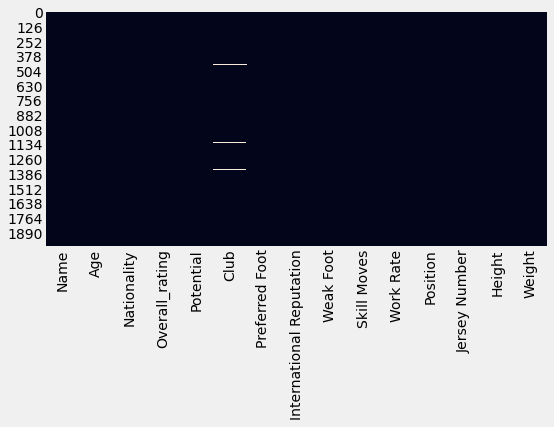

In [253]:
sns.heatmap(df.isnull(),cbar=False)


In [254]:
# club has 19 missing values (categorical column)
# we can impute mode values as it values missing are not much

In [255]:
df['Club'] = df['Club'].fillna(df['Club'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", df.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [256]:
# Lets first analyze the Numberical Columns
df.select_dtypes('number').head()

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
0,31,94,94,5,4,4,10,5.583333,159
1,33,94,94,5,4,5,7,6.166667,183
2,26,92,93,5,5,5,10,5.750000,150
3,27,91,93,4,3,1,1,6.333333,168
4,27,91,92,4,5,4,7,5.083333,154


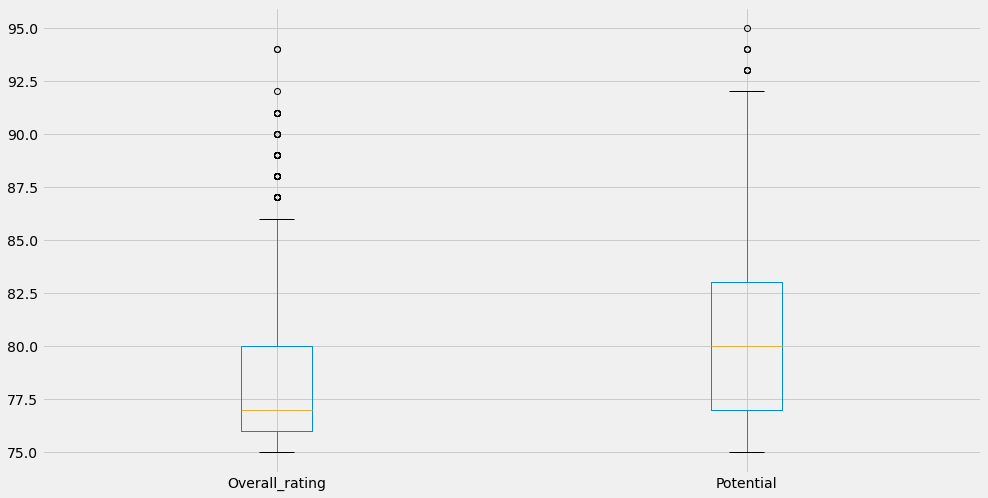

In [257]:
# lets check for outliers.
df[['Overall_rating','Potential']].plot(kind='box',figsize=(15,8))
plt.show()

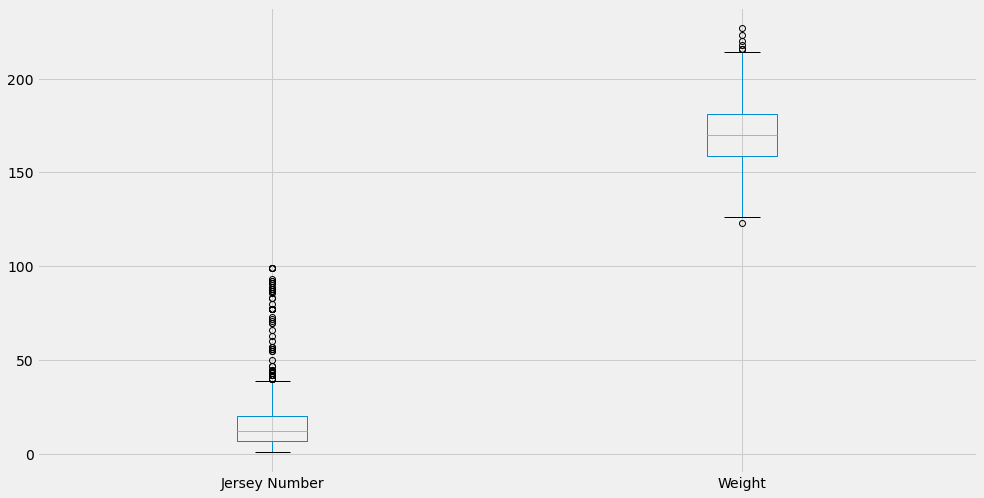

In [258]:
df[['Jersey Number','Weight']].plot(kind='box',figsize=(15,8))
plt.show()

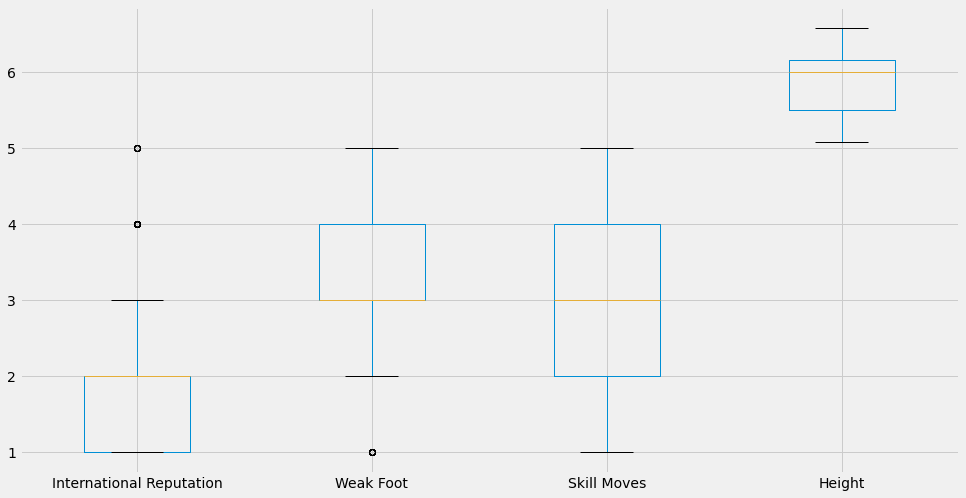

In [259]:
df[['International Reputation','Weak Foot','Skill Moves','Height']].plot(kind='box',figsize=(15,8))
plt.show()

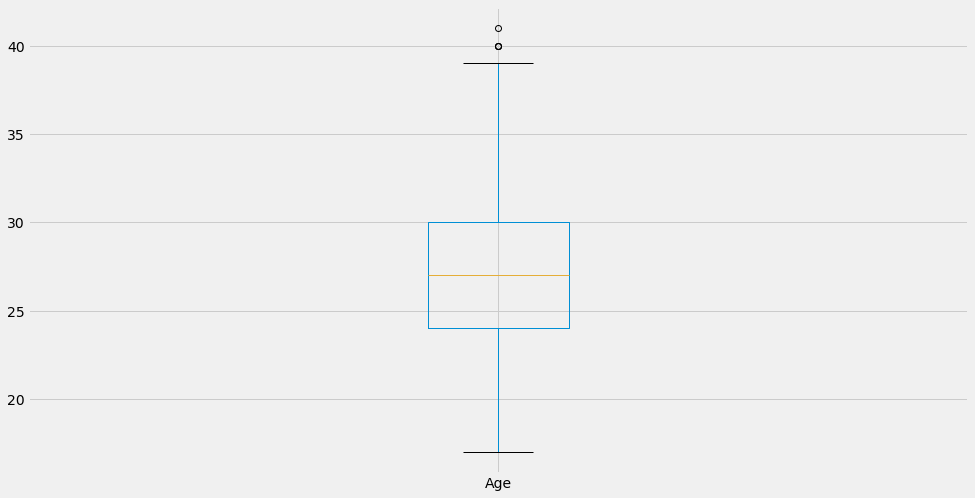

In [260]:
df[['Age']].plot(kind='box',figsize=(15,8))
plt.show()

Text(0, 0.5, 'Range')

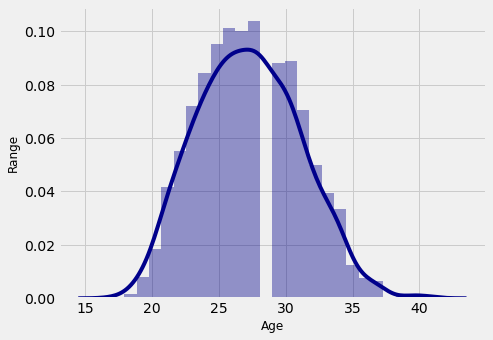

In [261]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Distribution plot for Age
plt.subplot(1, 2, 1)
sns.distplot(df['Age'], color = 'darkblue')
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Range', fontsize = 12)


Text(0.5, 1.0, 'International Reputation')

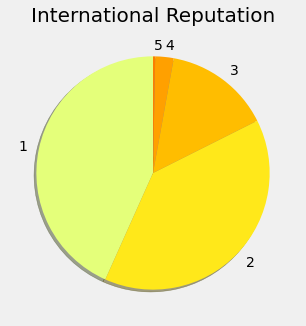

In [262]:
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')


plt.subplot(1, 3, 1)
labels = ['1','2','3','4','5']
sizes = df['International Reputation'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))

plt.pie(sizes, labels = labels, colors = colors, shadow = True, startangle = 90)
plt.title('International Reputation', fontsize = 20)

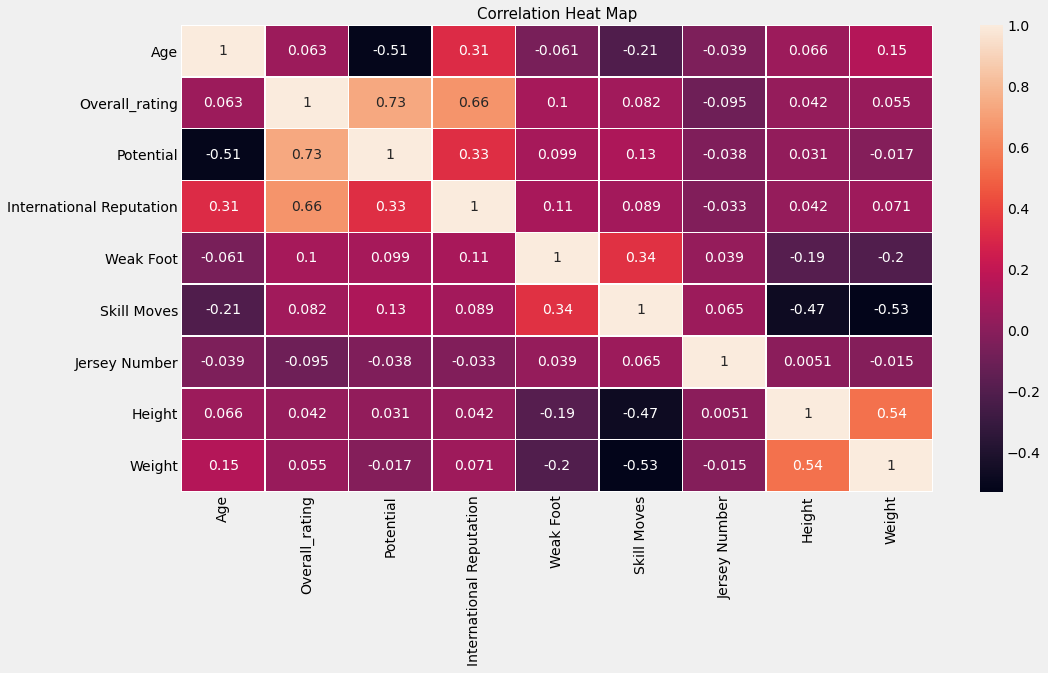

In [263]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), annot = True, linewidth = 0.5)
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

In [264]:
# lets remove some of the columns which are not very correlated
# jersey number has least correrelation with each feature

df = df.drop(['Jersey Number'], axis = 1)


In [265]:
## for international reputation i think 4 and 5 its important for overall rating
## we only have 3 outliers in potential so it may help in gettong overall rating

In [266]:
# columns needs to remove outliers
## weight


In [267]:
z=np.abs(stats.zscore(df['Weight']))
z

array([0.65298571, 0.84268685, 1.21386292, ..., 0.03253088, 0.65298571,
       1.65010075])

In [268]:
threshold=3
print(np.where(z>threshold))

(array([ 259, 1204, 1426, 1930], dtype=int64),)


In [269]:
df_new=df[(z<3)]

In [270]:
df_new.shape

(1996, 14)

a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

In [271]:
no_of_sample = 100
sample_size = 200
sample_mean_list=[]
for i in range(no_of_sample):
    sample = np.random.choice(df_new['Age'],size=sample_size,replace=True) # selecting sample with replacement
    sample_mean = np.mean(sample) # sample mean
    sample_mean_list.append(sample_mean)

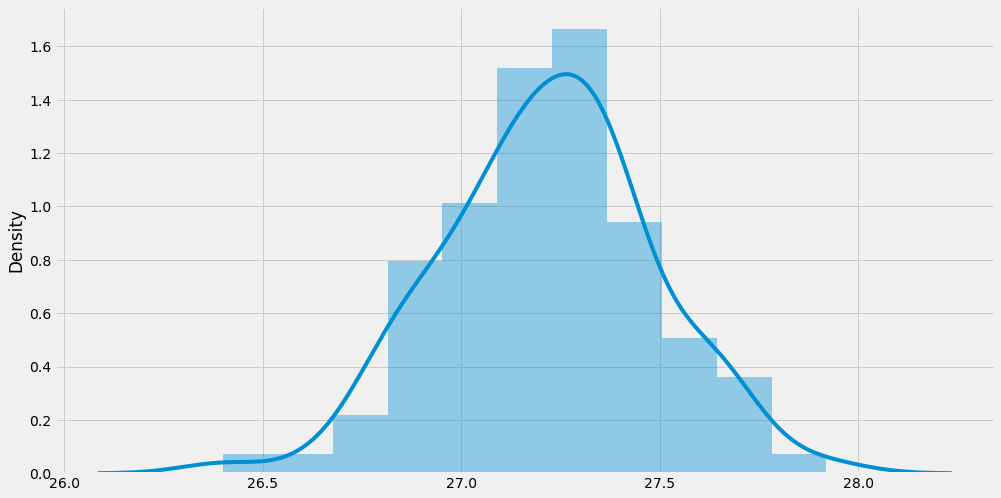

In [272]:
sns.distplot(sample_mean_list)
plt.show()

In [273]:
np.mean(sample_mean_list)
#mean of sampling distribution

27.217349999999996

In [274]:
np.mean(df['Age']) #mean of the population

27.2315

In [275]:
# since mean of sampling distribution is nearly equal to mean of the population .
# this proves central limit theorem.

In [276]:
sigma=np.std(sample_mean_list)
n=len(sample_mean_list)
print('standard error :',sigma/n**0.5)

sampling_mean_dist=np.mean(sample_mean_list)
print('mean of sampling distribution:',sampling_mean_dist)

pop_mean=np.mean(df_new['Age'])
print('population mean :',pop_mean)

pop_std=np.std(df_new['Age'])
print('population standard deviation :',pop_std)

standard error : 0.026324176625300184
mean of sampling distribution: 27.217349999999996
population mean : 27.228957915831664
population standard deviation : 3.858621650059651


b) Is there any evidence that the players overall rating is greater than 80?

In [277]:
######################################## Hypothesis formation #######################################

# H0 = overall rating <= 80
# Ha = overall rating > 80


####################################### Choosing the right step ######################################

### data is normal and pop standard deviation is not known 
### go with one sample t test (one tail left test)

print ('Performing one sample t test --- one tail - right ---')

####################################### Calculating test stats ######################################


x_bar = np.mean(df_new['Overall_rating'])
n= len(df_new['Overall_rating'])
s = np.std(df_new['Overall_rating'], ddof=1)
mu = 75


t = (x_bar-mu)/(s/n**0.5)

print('t values is: ',t)


########################################### Calculating p val #######################################

pval=stats.t.sf(t,df =n-1)
print('p values is: ',pval)

############################################# inference #############################################

sig_lvl =0.05
if pval<sig_lvl:
    print ('Ha is selected')
else:
    print('Ho is selected')

Performing one sample t test --- one tail - right ---
t values is:  43.483857841154325
p values is:  1.9420185661770447e-291
Ha is selected


In [278]:
## Alternate hypothesis selected therefore there is evidence of overall rating greater than 80

c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

In [279]:
#H0:TWO features are not related:>no impact
#Ha:TWO feautures are related :>impact

In [280]:
obs=pd.crosstab(df_new['Preferred Foot'],df_new['Potential'])

In [281]:
# calculating p value

t,p,dof,exp=stats.chi2_contingency(obs.values)
p

0.07502661950432309

In [282]:
if p<0.05:
    print('ha is selected')
else:
    print('ho is selected')

ho is selected


In [283]:
#two features are not related 
#preferred foot is not having any impact on potential.

In [284]:
#graphical analysis.

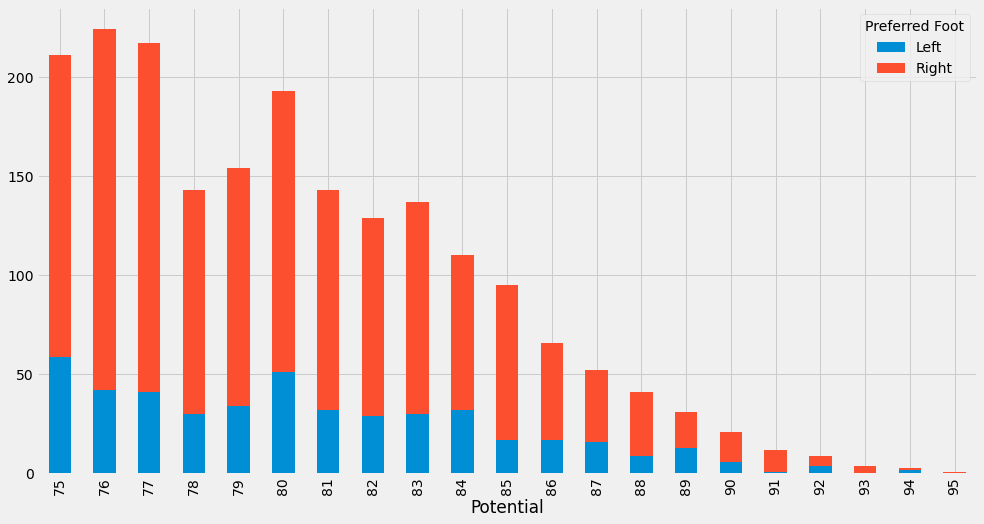

In [285]:
obs.T.plot.bar(stacked=True,figsize=(15,8))
plt.show()

d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

In [286]:
#HO:no relation btwn categorical features
#Ha:significant relation between categorical features

In [287]:
obs_val=pd.crosstab(df_new['Potential'],df_new['Overall_rating'])


In [288]:
t,p,dof,exp=stats.chi2_contingency(obs_val)
t,p,dof

(8587.409749611486, 0.0, 360)

In [289]:
pval=0.0
sig_lvl=0.05
if pval<sig_lvl:
    print('ha is selected')
else:
    print('ho is selected')

ha is selected


In [290]:
#there is significant relationship between overall rating and potential.

e)	Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

In [291]:
#HO:no relation btwn categorical features
#Ha:significant relation between categorical features

In [292]:
skill_move=df_new['Skill Moves']
overall_rating=df_new['Overall_rating']

In [293]:
obs_val=pd.crosstab(skill_move,overall_rating)

In [294]:
t,p,dof,exp=stats.chi2_contingency(obs_val)
t,p,dof

(264.5604461791655, 8.345038393386111e-24, 72)

In [295]:
if p<0.05:
    print('Ha is selected')
else:
    print('H0 is selected')

Ha is selected


In [296]:
#ha is selected means skill have effect in overall rating

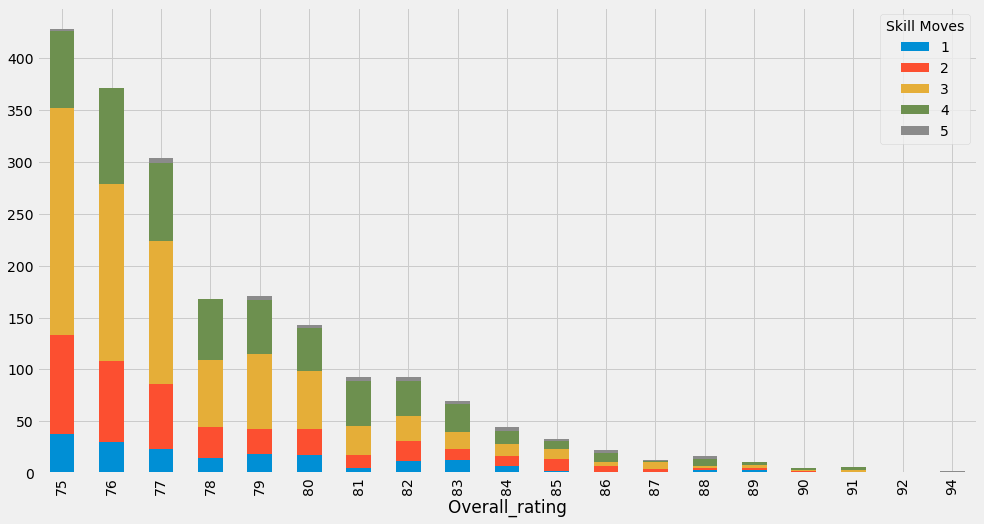

In [297]:
#graphical analysis
obs_val.T.plot.bar(stacked=True,figsize=(15,8))
plt.show()

##### 2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, messages of various network. Data Cleaning and basic EDA process needs to be performed. 

a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.

d)	Perform statistical tests to identify the relation between item and duration. Detailed 
explanation of relation between the classes is required.

e)	Perform statistical tests to identify the relation between network and network_type. 


In [298]:
df=pd.read_csv('phone.csv')
df.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [300]:
#data cleaning 
missing_values=df.isnull().sum()
missing_values

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

In [301]:
# no missing value

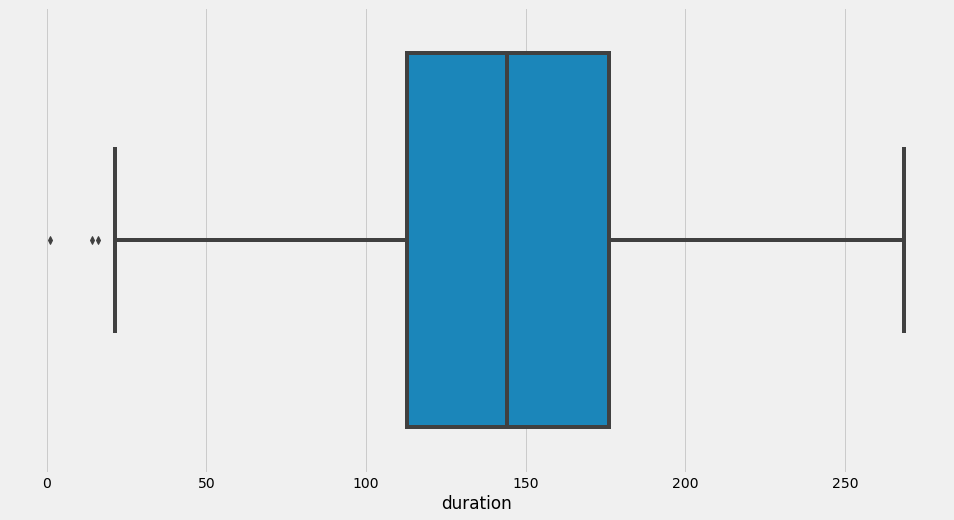

In [302]:
sns.boxplot(data=df,x='duration')
plt.show()

In [303]:
Q1 = df['duration'].quantile(0.25)
Q2 = df['duration'].quantile(0.5)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

In [304]:
df[(df['duration']<LL) | (df['duration']>UL)]

,date,duration,item,month,network,network_type
10,16-10-14 16:21,15.927469,call,2014-11,Three,mobile
587,14-01-15 23:35,14.173899,sms,2015-01,Three,mobile
721,12-02-15 6:58,0.993514,data,2015-02,data,data


In [305]:
df= df[~((df['duration']<LL) | (df['duration']>UL))]

In [306]:
df.shape

(817, 6)

a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network.
#Which of the Intervals are wider? Interpret the results.

In [307]:
df['network'].value_counts()

Vodafone     215
Three        213
data         149
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

In [308]:
group_a=df[df['network'] =='Three']['duration']
group_b=df[df['network'] =='Vodafone']['duration']
group_c=df[df['network'] =='data']['duration']
group_d=df[df['network'] =='Meteor']['duration']
group_e=df[df['network'] =='Tesco']['duration']
group_f=df[df['network'] =='landline']['duration']
group_g=df[df['network'] =='voicemail']['duration']

In [309]:
#calculating standard deviation for all the networks
sigma_a=np.std(group_a)
sigma_b=np.std(group_b)
sigma_c=np.std(group_c)
sigma_d=np.std(group_d)
sigma_e=np.std(group_e)
sigma_f=np.std(group_f)
sigma_g=np.std(group_g)
#calculate mean for all the networks
x_bar_a=np.mean(group_a)
x_bar_b=np.mean(group_b)
x_bar_c=np.mean(group_c)
x_bar_d=np.mean(group_d)
x_bar_e=np.mean(group_e)
x_bar_f=np.mean(group_f)
x_bar_g=np.mean(group_g)


In [310]:
#for 95% confidence interval
n=7
print('lower limit of Three network, upper limit of Three network:',stats.t.interval(loc=x_bar_a,scale=sigma_a/n**0.5,alpha=0.95,df=n-1))
print('lower limit of vodafone network, upper limit of vodafone network:',stats.t.interval(loc=x_bar_b,scale=sigma_b/n**0.5,alpha=0.95,df=n-1))
print('lower limit of data network ,upper limit of data network:',stats.t.interval(loc=x_bar_c,scale=sigma_c/n**0.5,alpha=0.95,df=n-1))
print('lower limit of meteor network upper limit of meteor network:',stats.t.interval(loc=x_bar_d,scale=sigma_d/n**0.5,alpha=0.95,df=n-1))
print('lower limit of Tesco network upper limit of Tesco network:',stats.t.interval(loc=x_bar_e,scale=sigma_e/n**0.5,alpha=0.95,df=n-1))
print('lower limit of landline network upper limit of landline network:',stats.t.interval(loc=x_bar_f,scale=sigma_f/n**0.5,alpha=0.95,df=n-1))
print('lower limit of voicemail network upper limit of voicemail network:',stats.t.interval(loc=x_bar_g,scale=sigma_g/n**0.5,alpha=0.95,df=n-1))

lower limit of Three network, upper limit of Three network: (102.7582840557801, 182.53144326998495)
lower limit of vodafone network, upper limit of vodafone network: (106.32065287767384, 192.89189061823325)
lower limit of data network ,upper limit of data network: (105.11102607171611, 178.70512026801524)
lower limit of meteor network upper limit of meteor network: (96.64421405171643, 182.86980932037565)
lower limit of Tesco network upper limit of Tesco network: (101.906542977806, 188.66846495576544)
lower limit of landline network upper limit of landline network: (99.32984756799073, 183.90543435843796)
lower limit of voicemail network upper limit of voicemail network: (110.2169216187794, 207.93076123529465)


In [311]:
#for 95% confidence interval


print('lower limit of Three network, upper limit of Three network:',stats.t.interval(loc=x_bar_a,scale=sigma_a/n**0.5,alpha=0.99,df=n-1))
print('lower limit of vodafone network, upper limit of vodafone network:',stats.t.interval(loc=x_bar_b,scale=sigma_b/n**0.5,alpha=0.99,df=n-1))
print('lower limit of data network ,upper limit of data network:',stats.t.interval(loc=x_bar_c,scale=sigma_c/n**0.5,alpha=0.99,df=n-1))
print('lower limit of meteor network upper limit of meteor network:',stats.t.interval(loc=x_bar_d,scale=sigma_d/n**0.5,alpha=0.99,df=n-1))
print('lower limit of Tesco network upper limit of Tesco network:',stats.t.interval(loc=x_bar_e,scale=sigma_e/n**0.5,alpha=0.99,df=n-1))
print('lower limit of landline network upper limit of landline network:',stats.t.interval(loc=x_bar_f,scale=sigma_f/n**0.5,alpha=0.99,df=n-1))
print('lower limit of voicemail network upper limit of voicemail network:',stats.t.interval(loc=x_bar_g,scale=sigma_g/n**0.5,alpha=0.99,df=n-1))


lower limit of Three network, upper limit of Three network: (82.21088318123921, 203.07884414452585)
lower limit of vodafone network, upper limit of vodafone network: (84.02225146568978, 215.1902920302173)
lower limit of data network ,upper limit of data network: (86.15518465405773, 197.6609616856736)
lower limit of meteor network upper limit of meteor network: (74.43484076020997, 205.07918261188212)
lower limit of Tesco network upper limit of Tesco network: (79.5590264811881, 211.01598145238336)
lower limit of landline network upper limit of landline network: (77.54547168140307, 205.68981024502563)
lower limit of voicemail network upper limit of voicemail network: (85.0484883591672, 233.09919449490684)


In [312]:
#the greater the confidence level ,the wider the confidence interval.
#width =Upper limit-lower limit 
#for confidence interval of 95%
print('the width of Three network for 95% Interval:',182.7432573316517-100.17262478745505)
print('the width of vodafone network for 95% Interval:',192.89189061823325-106.32065287767384)
print('the width of data network for 95% Interval:',179.14547294936517-102.79181260490128)
print('the width of meteor network for 95% Interval:',182.86980932037565-96.64421405171643)
print('the width of tesco network for 95% Interval:',188.66846495576544-101.906542977806)
print('the width of landline network for 95% Interval:',183.90543435843796-99.32984756799073)
print('the width of voicemail network for 95% Interval:',207.93076123529465-110.2169216187794)

the width of Three network for 95% Interval: 82.57063254419666
the width of vodafone network for 95% Interval: 86.57123774055941
the width of data network for 95% Interval: 76.35366034446389
the width of meteor network for 95% Interval: 86.22559526865922
the width of tesco network for 95% Interval: 86.76192197795945
the width of landline network for 95% Interval: 84.57558679044723
the width of voicemail network for 95% Interval: 97.71383961651526


In [313]:
#the greater the confidence level ,the wider the confidence interval.
#width =Upper limit-lower limit 
#for confidence interval of 99%

print('the width of Three network for 99% Interval:',204.011211416237-78.90467070286977)
print('the width of vodafone network for 99% Interval:',215.1902920302173-84.02225146568978)
print('the width of data network for 99% Interval:',198.81210371578055-83.12518183848591)
print('the width of meteor network for 99% Interval:',205.07918261188212-74.43484076020997)
print('the width of tesco network for 99% Interval:',211.01598145238336-79.5590264811881)
print('the width of landline network for 99% Interval:',205.68981024502563-77.54547168140307)
print('the width of voicemail network for 99% Interval:',233.09919449490684-85.0484883591672)

the width of Three network for 99% Interval: 125.10654071336722
the width of vodafone network for 99% Interval: 131.16804056452753
the width of data network for 99% Interval: 115.68692187729464
the width of meteor network for 99% Interval: 130.64434185167215
the width of tesco network for 99% Interval: 131.45695497119527
the width of landline network for 99% Interval: 128.14433856362257
the width of voicemail network for 99% Interval: 148.05070613573963


In [314]:
## the width of voicemail is greater among all the networks for both 95% and 99% confidence interval.

b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

In [315]:
stats.shapiro(group_a)[1]

0.7490808367729187

In [316]:
#Test of normality:shapiro wilk test
# Ho : skew=0 (Data is normal)
# Ha : skew != 0 (Data is not normal)

sig_lvl = 0.05  # default : 0.05


print('shapiro of Three network:',stats.shapiro(group_a))
pvalue = stats.shapiro(group_a)[1]
if pvalue>=sig_lvl:
    print('Ho is selected')
else:
    print('Ha is selected')
print()

print('shapiro of Vodafone network:',stats.shapiro(group_b))
pvalue = stats.shapiro(group_b)[1]
if pvalue>=sig_lvl:
    print('Ho is selected')
else:
    print('Ha is selected')
print()

print('shapiro of data network:',stats.shapiro(group_c))
pvalue = stats.shapiro(group_c)[1]
if pvalue>=sig_lvl:
    print('Ho is selected')
else:
    print('Ha is selected')
print()

print('shapiro of Meteor network:',stats.shapiro(group_d))
pvalue = stats.shapiro(group_d)[1]
if pvalue>=sig_lvl:
    print('Ho is selected')
else:
    print('Ha is selected')
print()

print('shapiro of Tesco network:',stats.shapiro(group_e))
pvalue = stats.shapiro(group_e)[1]
if pvalue>=sig_lvl:
    print('Ho is selected')
else:
    print('Ha is selected')
print()

print('shapiro of landline network:',stats.shapiro(group_f))
pvalue = stats.shapiro(group_f)[1]
if pvalue>=sig_lvl:
    print('Ho is selected')
else:
    print('Ha is selected')
print()

print('shapiro of Voicemail network:',stats.shapiro(group_g))
pvalue = stats.shapiro(group_g)[1]
if pvalue>=sig_lvl:
    print('Ho is selected')
else:
    print('Ha is selected')
print()

shapiro of Three network: ShapiroResult(statistic=0.9952569007873535, pvalue=0.7490808367729187)
Ho is selected

shapiro of Vodafone network: ShapiroResult(statistic=0.9921150803565979, pvalue=0.3013075590133667)
Ho is selected

shapiro of data network: ShapiroResult(statistic=0.9919514656066895, pvalue=0.5642256140708923)
Ho is selected

shapiro of Meteor network: ShapiroResult(statistic=0.9902763962745667, pvalue=0.7697541117668152)
Ho is selected

shapiro of Tesco network: ShapiroResult(statistic=0.9873518347740173, pvalue=0.5880236029624939)
Ho is selected

shapiro of landline network: ShapiroResult(statistic=0.9797297120094299, pvalue=0.6510748267173767)
Ho is selected

shapiro of Voicemail network: ShapiroResult(statistic=0.9571559429168701, pvalue=0.31774839758872986)
Ho is selected



In [317]:
# for all H0 is selected so data is normal therefore all networks equally distributed

c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.

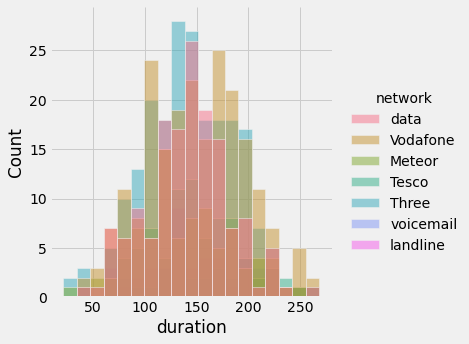

In [318]:
sns.displot(df, x="duration", hue="network")


In [319]:
## duration of around 150 for each network is higest and it looks like normal distributed 

d).Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

In [320]:
#HO:no relation btwn categorical features i.e:between item and duration
#Ha:significant relation between categorical features 

In [321]:
df['item'].value_counts()

call    387
sms     281
data    149
Name: item, dtype: int64

In [322]:
item_a = df[df['item'] =='call']['duration']
item_b = df[df['item'] =='sms']['duration']
item_c = df[df['item'] =='data']['duration']

In [323]:
# Ho : All means are equal
# Ha : Atleast one mean is not equal

# Test of Normality - Shapiro

# Ho : Data is normal
# Ha : Data is not normal

print(stats.shapiro(item_a))
print(stats.shapiro(item_b))
print(stats.shapiro(item_c))

ShapiroResult(statistic=0.9969531297683716, pvalue=0.6871918439865112)
ShapiroResult(statistic=0.9923015832901001, pvalue=0.1533391773700714)
ShapiroResult(statistic=0.9919514656066895, pvalue=0.5642256140708923)


In [324]:
# All pvalues > 0.05,All data are normal
            

In [325]:
# Equality of Variance 

# Levene's Test

# Ho : All variance are equal
# Ha : Atleast one variance is not equal

In [326]:
print(stats.levene(item_a,item_b,item_c))

LeveneResult(statistic=4.092515418119407, pvalue=0.017041963421727344)


In [327]:
# Data is normal
# Data have equal variance
# Pop std in unknow

# Anova can be used

In [328]:
stats.f_oneway(item_a,item_b,item_c)

F_onewayResult(statistic=1.7983201078741975, pvalue=0.16623399843208436)

In [329]:
pval=0.1456068656611744
if pval<0.05:
    print('Ha is selected')
else:
    print('Ho is selected')

Ho is selected


In [330]:
#Accept Null Hypothetis i.e. All mean are equal.

e).Perform statistical tests to identify the relation between network and network_type. 

In [331]:
#HO:no relation btwn categorical features
#Ha:significant relation between categorical features

In [332]:
obs_val=pd.crosstab(df['network'],df['network_type'])
obs_val

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,213,0
Vodafone,0,0,215,0
data,149,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


In [333]:
test_stat,pval,dof,exp = stats.chi2_contingency(obs_val)
print('Test stat:',test_stat)
print('pval:',pval)
print('Degrees of freedom:',dof)
print('Expected:',exp)

Test stat: 2451.0
pval: 0.0
Degrees of freedom: 18
Expected: [[ 15.86658507   4.47246022  63.78580171   2.875153  ]
 [ 15.31946144   4.31823745  61.58629131   2.77600979]
 [ 38.84577723  10.9498164  156.16523868   7.03916769]
 [ 39.21052632  11.05263158 157.63157895   7.10526316]
 [ 27.17380661   7.65973072 109.24235006   4.92411261]
 [  7.65973072   2.15911873  30.79314565   1.3880049 ]
 [  4.92411261   1.3880049   19.79559364   0.89228886]]


In [334]:
pval = 0.0
sig_lvl = 0.05
if pval<sig_lvl:
    print('Ha is selected')
else:
    print('Ho is selected')

Ha is selected


In [335]:
## there is significant relationship between network and network type.